# **Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Fashion MNIST**

**Problema:** construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: **T-shirt/top; Trouser; Pullover; Dress; Coat; Sandal; Shirt; Sneaker; Bag; Ankle boot**.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O conjunto de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#loading-data-with-other-machine-learning-libraries) é uma coleção de imagens comumente usadas para treinar algoritmos de aprendizado de máquina e visão computacional. É um dos conjuntos de dados mais amplamente utilizados para pesquisa de aprendizado de máquina.

In [80]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Carregando os dados de Treino, Validação e Teste**

In [81]:
# Carrega o dataset Fashion MNIST - Já está no Keras!
# Todos os DS no Keras -> https://keras.io/api/datasets/

(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

# Divide o dataset de teste em dois: metade para validação e metade para predição
imagens_validacao, imagens_predicao, labels_validacao, labels_predicao = train_test_split(imagens_teste, labels_teste, test_size=0.5, random_state=42)

In [82]:
# Classes das imagens
nomes_classes = ['Camiseta/Top', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota de cano curto']

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [83]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [84]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])  # labels[i] já deve ser um valor único, não uma lista
    plt.show()

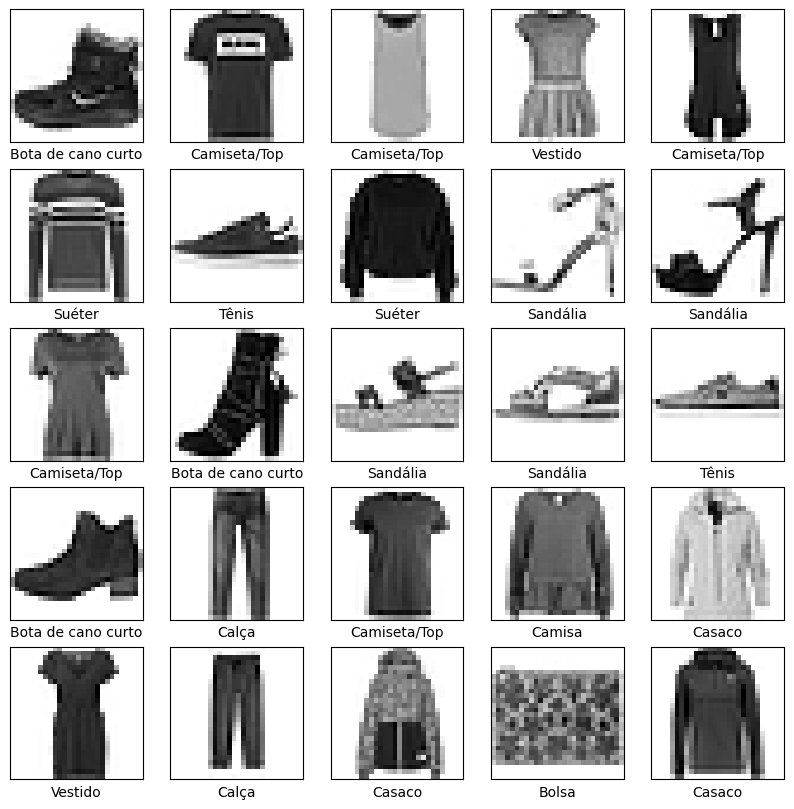

In [85]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [86]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_vivi = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_vivi.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))) # Alterado para (28, 28, 1)
modelo_vivi.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_vivi.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_vivi.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_vivi.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_vivi.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_vivi.add(layers.Flatten())
modelo_vivi.add(layers.Dense(64, activation = 'relu'))
modelo_vivi.add(layers.Dense(10, activation = 'softmax'))

In [88]:
# Compilação do modelo
modelo_vivi.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

**Treinamento**

In [89]:
# Executando o treinamento, usando o conjunto de validação
%%time
history = modelo_vivi.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_validacao, labels_validacao))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7100 - loss: 0.7937 - val_accuracy: 0.7972 - val_loss: 52.9103
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8493 - loss: 0.4133 - val_accuracy: 0.7300 - val_loss: 72.6533
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8717 - loss: 0.3441 - val_accuracy: 0.7532 - val_loss: 53.9086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8847 - loss: 0.3091 - val_accuracy: 0.7188 - val_loss: 67.3068
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8942 - loss: 0.2854 - val_accuracy: 0.7222 - val_loss: 71.5218
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9049 - loss: 0.2591 - val_accuracy: 0.7174 - val_loss: 81.5022
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9104 - loss: 0.2399 - val_accuracy: 0.6630 - val_loss: 110.8479
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9177 - loss: 

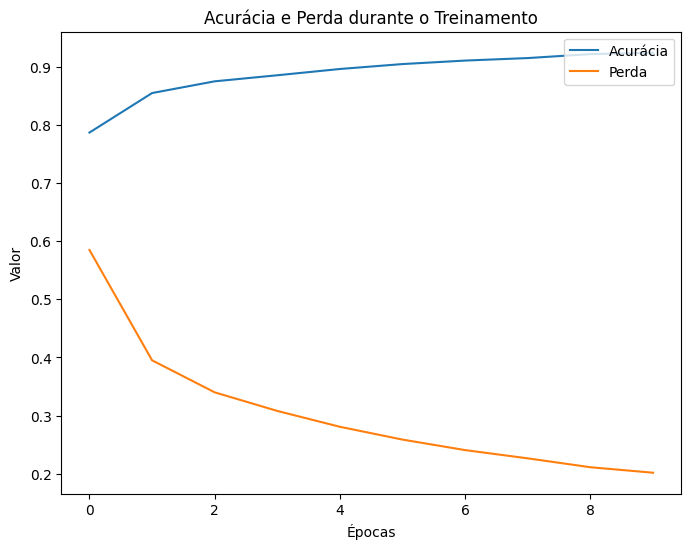

In [91]:
# Função para plotar os gráficos de acurácia e perda no mesmo gráfico
def plotar_grafico_treinamento(history):
    epochs_range = range(len(history.history['accuracy']))

    plt.figure(figsize=(8, 6))

    # Plotando acurácia e perda no mesmo gráfico
    plt.plot(epochs_range, history.history['accuracy'], label='Acurácia')
    plt.plot(epochs_range, history.history['loss'], label='Perda')

    plt.title('Acurácia e Perda durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Valor')
    plt.legend(loc='upper right')

    plt.show()

# Chamar a função para plotar o gráfico
plotar_grafico_treinamento(history)

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Previsão - Testar o modelo (Deploy)**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

In [92]:
# Após o treinamento, você pode usar o dataset de predição para avaliar o modelo
resultados = modelo_vivi.evaluate(imagens_predicao, labels_predicao)
print(f"Acurácia no conjunto de predição: {resultados[1]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 136.4497
Acurácia no conjunto de predição: 0.6705999970436096


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


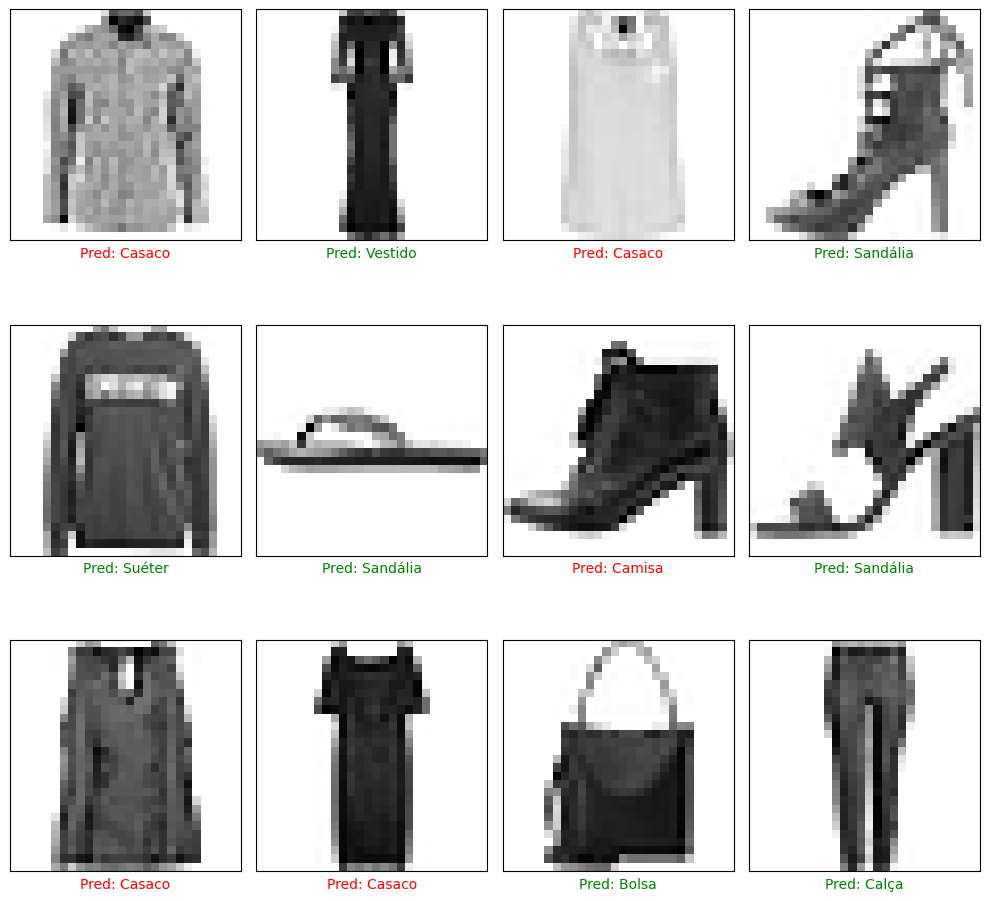

In [94]:
# Gerar previsões para o conjunto de teste
predicoes = modelo_vivi.predict(imagens_predicao)

# Função para exibir 12 imagens com as previsões do modelo
def exibir_imagens_com_predicoes(imagens, labels, predicoes, nomes_classes):
    plt.figure(figsize=(10, 10))

    for i in range(12):  # Exibir 12 imagens
        plt.subplot(3, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # Exibir a imagem
        plt.imshow(imagens[i], cmap=plt.cm.binary)

        # Obter a previsão
        pred_label = np.argmax(predicoes[i])

        # Definir a cor da label (verde se correto, vermelho se incorreto)
        color = 'green' if pred_label == labels[i] else 'red'

        # Colocar a previsão embaixo da imagem
        plt.xlabel(f"Pred: {nomes_classes[pred_label]}", color=color)

    plt.tight_layout()
    plt.show()

# Exibir 12 imagens do conjunto de teste com suas previsões
exibir_imagens_com_predicoes(imagens_predicao, labels_predicao, predicoes, nomes_classes)

Fim! 🔥